# Datapaper plots

1. field_location.png Modis moa Inset map, ant in corner, icestreams scale, square of common border, include flow route,
2. geophysics_overview.png Map of all data presented
3. historic_channel.png Historic landsat images
4. thickness_surfacecolour.png Profile depth
5. 4square_channel.png Four square = imagery, surface, bed&surface, change
6. 3D view of channel
7. radarlines 
8. channel_meander.png meander
11. ApRES include stress
9. Icesat1/REMA
10. Icesat2


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import time
import datetime as dt
import pandas as pd
import geopandas as gpd
import scipy as sp
from scipy import signal
from tqdm.notebook import tqdm
import rasterio as rio
from shapely.geometry import Point, LineString, Polygon, MultiPoint
import fiona
from shapely.ops import nearest_points
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

In [2]:
xmin, xmax, ymin, ymax = -382700, -374781.9, -734075.1, -721770.2

a = 10000

xmin= xmin- a

xmax=xmax+ a

ymin=ymin- a

ymax = ymax+ a

In [3]:
xmin

-392700

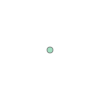

In [4]:
centre_point = Point(np.mean([xmin,xmax]),np.mean([ymin,ymax]))
centre_point

In [5]:
centre_point_gpd = gpd.GeoDataFrame({'p':[centre_point]},geometry=[centre_point],crs=3031)

In [6]:
centre_point_gpd.to_crs(4326,inplace=True)
centre_point_gpd.geometry

0    POINT (-152.51187 -82.45833)
Name: geometry, dtype: geometry

In [7]:
path85 = '/Users/home/whitefar/DATA/REMOTE_SENSING/LANDSAT/LT05_L1GS_226122_19850124_20200918_02_T2/LT05_L1GS_226122_19850124_20200918_02_T2_B1.TIF'

with rio.open(path85) as image:
    im_85 = image.read(1)
    extent_85 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]

In [8]:
path89 = '/Users/home/whitefar/DATA/REMOTE_SENSING/LANDSAT/LT04_L1GS_233121_19891128_20200916_02_T2/LT04_L1GS_233121_19891128_20200916_02_T2_B3.TIF'

with rio.open(path89) as image:
    im_89 = image.read(1)
    extent_89 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]

In [9]:
path02 = '/Users/home/whitefar/DATA/REMOTE_SENSING/LANDSAT/LE07_L1GT_227122_20021224_20200916_02_T2/LE07_L1GT_227122_20021224_20200916_02_T2_B8.TIF'

with rio.open(path02) as image:
    im_02 = image.read(1)
    extent_02 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]

In [10]:
path06 = '/Users/home/whitefar/DATA/REMOTE_SENSING/LANDSAT/LE07_L2SR_232122_20061206_20200913_02_T2/LE07_L2SR_232122_20061206_20200913_02_T2_SR_B1.TIF'

with rio.open(path06) as image:
    im_06 = image.read(1)
    extent_06 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]

In [11]:
path20 = '/Users/home/whitefar/DATA/REMOTE_SENSING/LANDSAT/LC08_L2SR_231122_20201213_20201219_02_T2/LC08_L2SR_231122_20201213_20201219_02_T2_SR_B3.TIF'

with rio.open(path20) as image:
    im_20 = image.read(1)
    extent_20 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]

## 3. historic_channel.png 
Historic landsat images

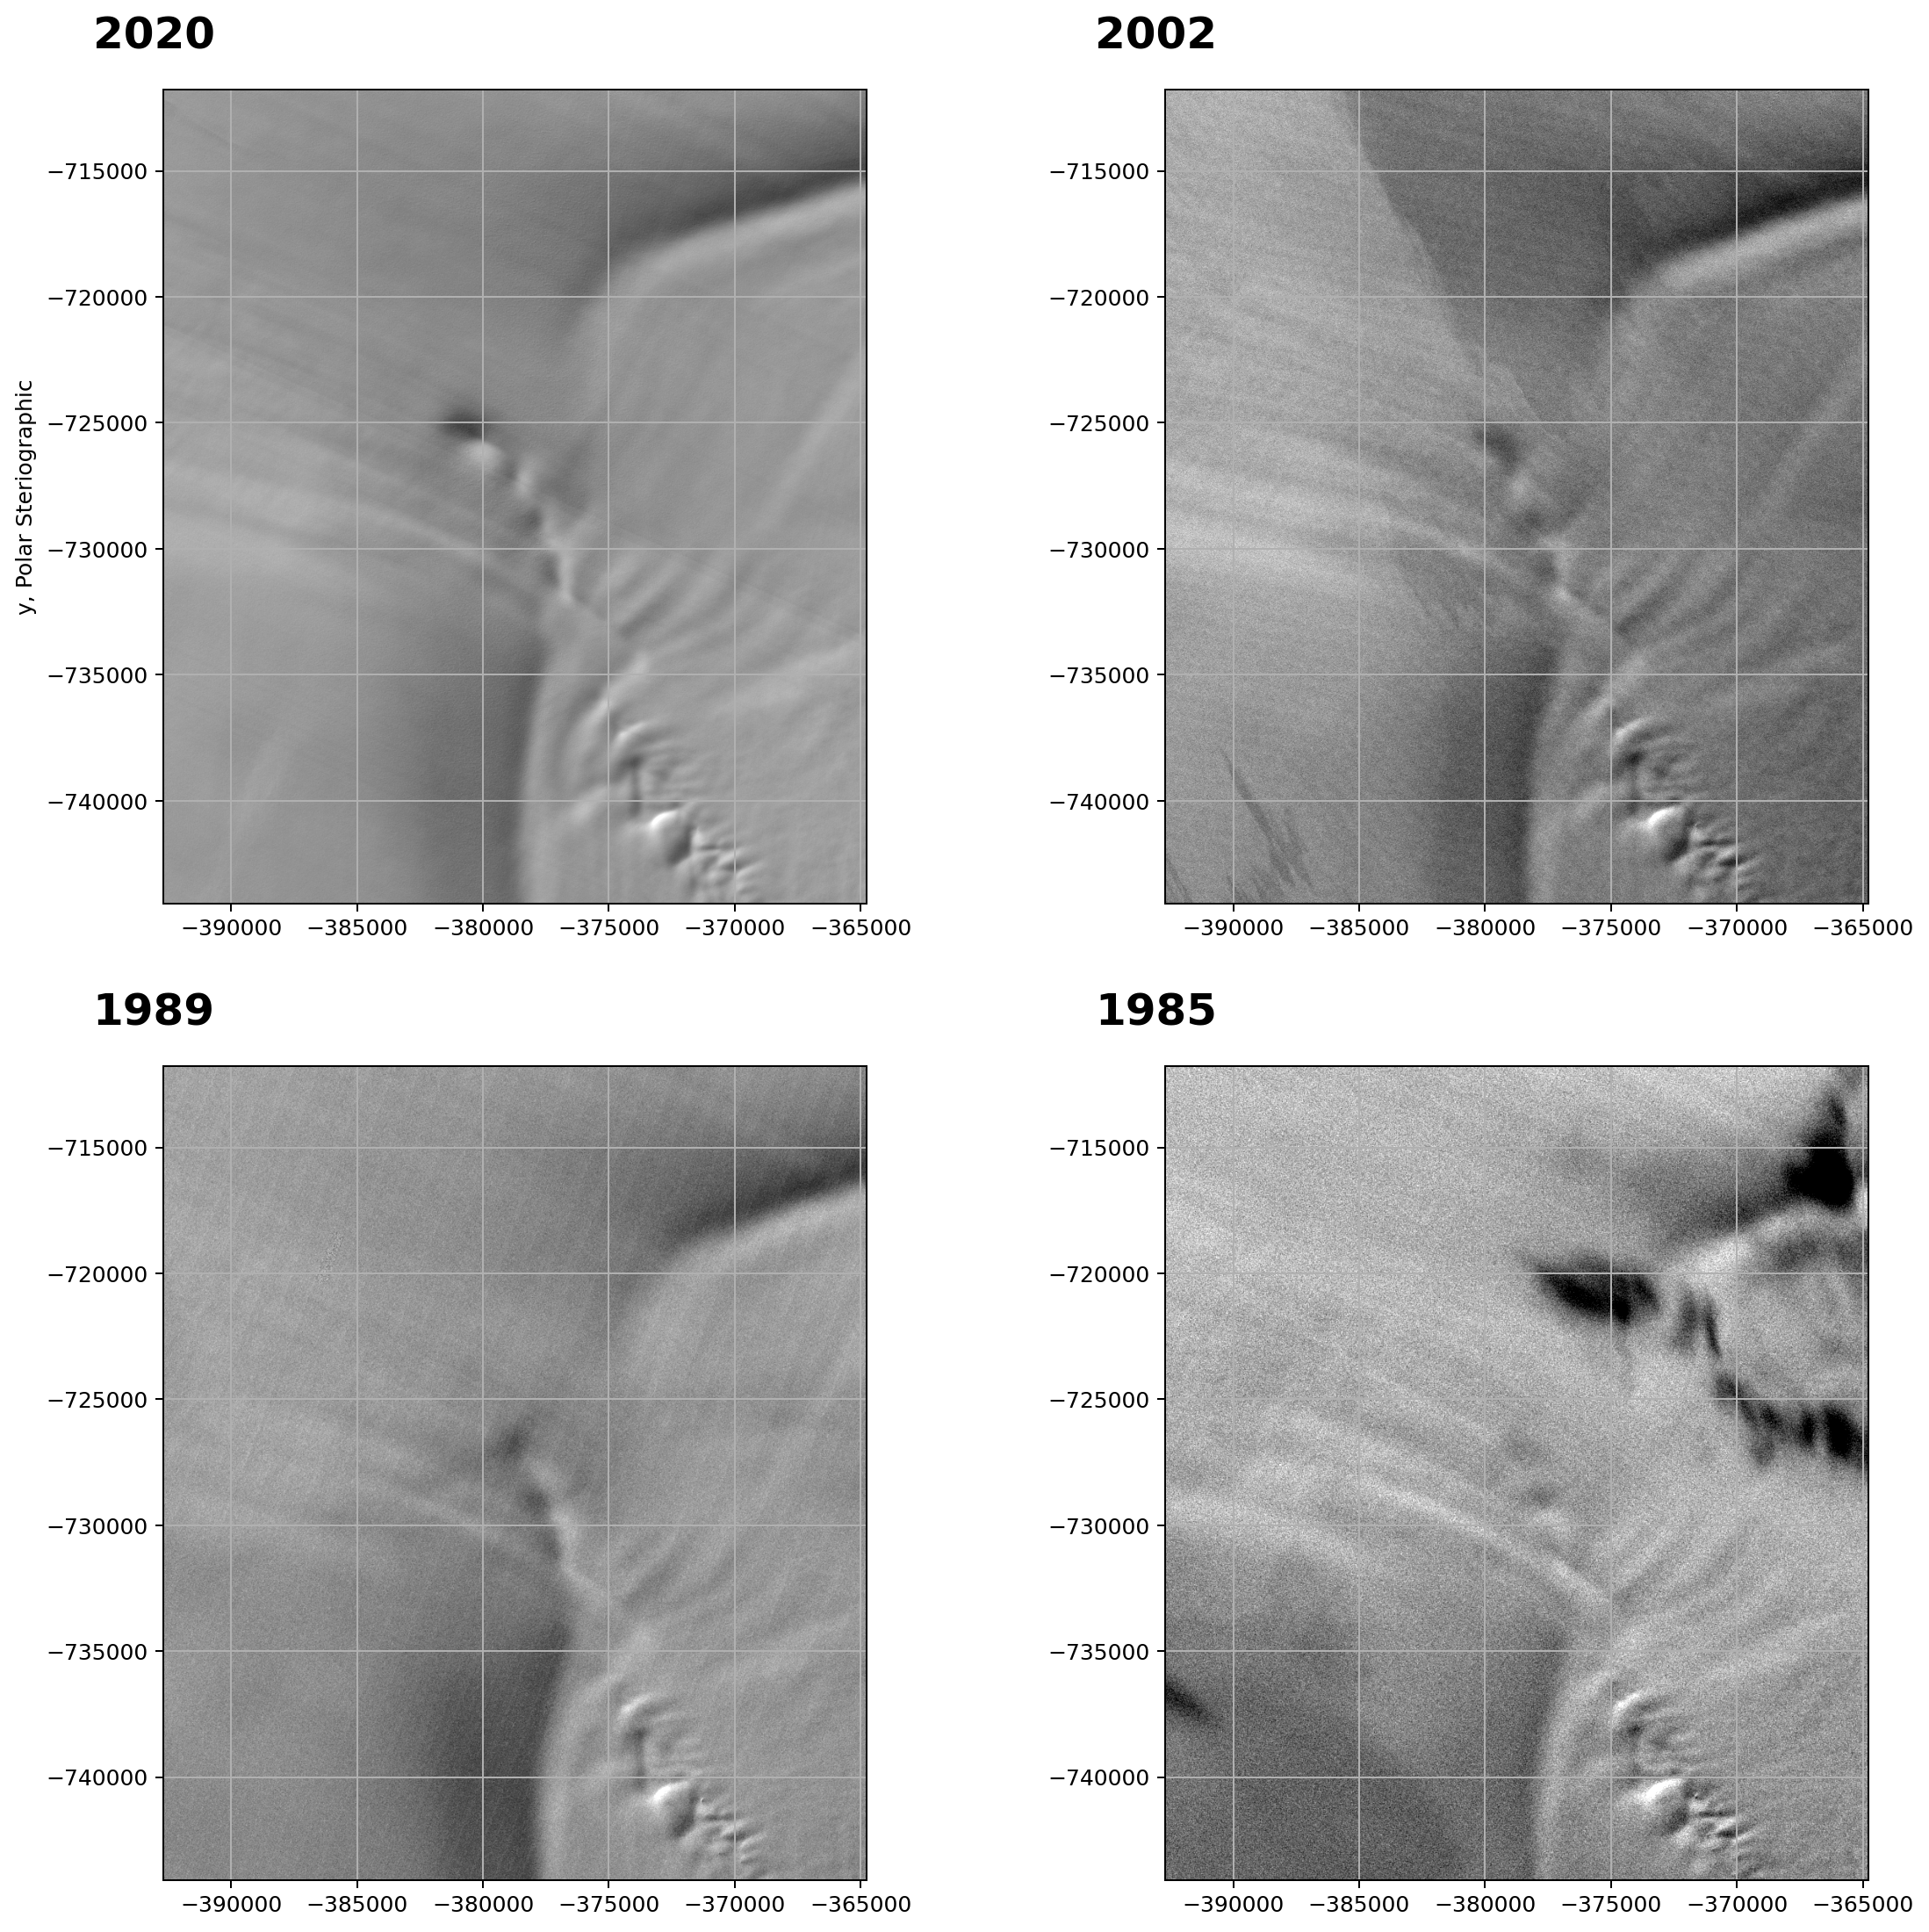

In [12]:
fig, ax = plt.subplots(2,2, dpi=180,figsize=(15,15))

aa = ax[0,0].imshow(im_20,extent=extent_20, vmin=38000,vmax=43000, cmap='gist_gray')
ax[0,0].grid()
ax[0,0].set_xlim([xmin,xmax])
ax[0,0].set_ylim([ymin,ymax])
ax[0,0].set_ylabel('y, Polar Steriographic')
# fig.colorbar(aa,ax=ax[0,0])


a1 = ax[0,1].imshow(im_02,extent=extent_02,vmin=115,vmax=130, cmap='gist_gray')
ax[0,1].grid()
ax[0,1].set_xlim([xmin,xmax])
ax[0,1].set_ylim([ymin,ymax])
# fig.colorbar(a1,ax=ax[0,1])

a2 = ax[1,0].imshow(im_89,extent=extent_89,vmin=115,vmax=135, cmap='gist_gray')
ax[1,0].grid()
ax[1,0].set_xlim([xmin,xmax])
ax[1,0].set_ylim([ymin,ymax])
# fig.colorbar(a2,ax=ax[1,0])

a3 = ax[1,1].imshow(im_85,extent=extent_85,vmin=175,vmax=190, cmap='gist_gray')
ax[1,1].grid()
ax[1,1].set_xlim([xmin,xmax])
ax[1,1].set_ylim([ymin,ymax])
# fig.colorbar(a3,ax=ax[1,1])

axs = ax.flat

titles = ['2020','2002','1989','1985']

for n, a in enumerate(axs):
    a.text(-0.1, 1.05, titles[n], transform=a.transAxes, 
            size=20, weight='bold')

plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/historic_channel.png')
plt.show()